In [1]:
import numpy as np
import pandas as pd
from caits.dataset import CoreArray, DatasetArray

In [2]:
initial_data = pd.read_csv("data/AirQuality.csv", sep=';', decimal=",").iloc[:9357, 2:-2]
print(initial_data.head())

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  


In [3]:
print(initial_data)

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0    -200.0      13.5         1101.0    472.0   
9353     2.4       1163.0    -200.0      11.4         1027.0    353.0   
9354     2.4       1142.0    -200.0      12.4         1063.0    293.0   
9355     2.1       1003.0    -200.0       9.5          961.0    235.0   
9356     2.2       1071.0    -200.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0     

In [4]:
data = DatasetArray(
    CoreArray(initial_data.values, {"axis_1": initial_data.columns}),
)

print(data)

DatasetArray object with 9357 instances.


In [5]:
from caits.transformers import SklearnWrapper
from sklearn.preprocessing import MinMaxScaler

scaler = SklearnWrapper(MinMaxScaler, {"feature_range": (-1, 1)})

scaled_data = scaler.fit_transform(data)
scaled_data


DatasetArray object with 9357 instances.

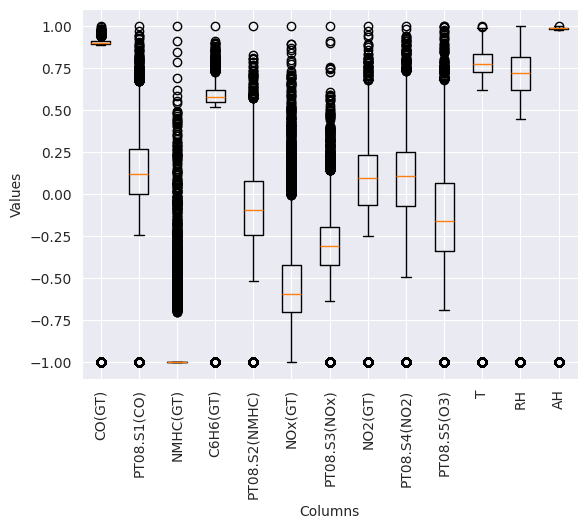

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(scaled_data.X.values, tick_labels=data.X.keys()["axis_1"])
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [7]:
from matplotlib.cbook import boxplot_stats

print(pd.DataFrame(boxplot_stats(data.X.values, whis=1.5), index=data.X.keys()["axis_1"]))

                      mean       iqr         cilo         cihi     whishi  \
CO(GT)          -34.207524    2.0000     1.467539     1.532461     5.6000   
PT08.S1(CO)    1048.990061  300.0000  1048.130856  1057.869144  1669.0000   
NMHC(GT)       -159.090093    0.0000  -200.000000  -200.000000  -200.0000   
C6H6(GT)          1.865683    9.6000     7.744187     8.055813    28.0000   
PT08.S2(NMHC)   894.595276  394.0000   888.605191   901.394809  1696.0000   
NOx(GT)         168.616971  234.0000   137.202068   144.797932   635.0000   
PT08.S3(NOx)    794.990168  323.0000   788.757555   799.242445  1442.0000   
NO2(GT)          58.148873   80.0000    94.701562    97.298438   253.0000   
PT08.S4(NO2)   1391.479641  477.0000  1438.258062  1453.741938  2376.0000   
PT08.S5(O3)     975.072032  555.0000   932.992084   951.007916  2087.0000   
T                 9.778305   13.2000    16.985758    17.414242    43.4000   
RH               39.485380   27.8000    48.148793    49.051207    88.7000   

In [8]:
valid_data = pd.DataFrame(data.X.values, columns=data.X.keys()["axis_1"]).drop(columns=["NMHC(GT)"])
means = valid_data.replace(-200, pd.NA).mean()
valid_data = valid_data.apply(lambda col: col.replace(-200, means[col.name]))

print(valid_data.head())

   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888  


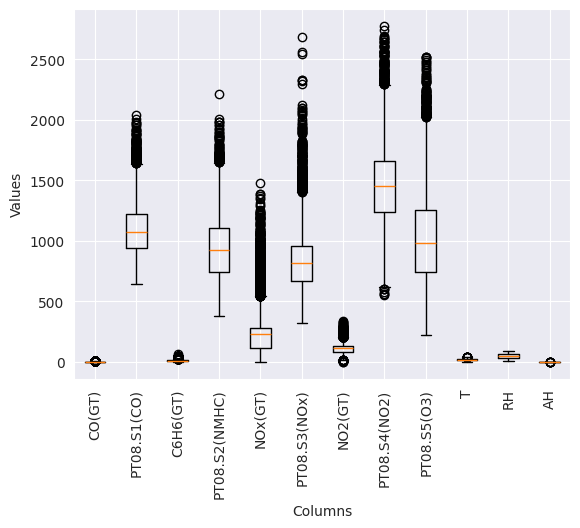

In [9]:
plt.boxplot(valid_data.values, tick_labels=valid_data.columns)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()


In [10]:
print(pd.DataFrame(boxplot_stats(valid_data.values, whis=1.5), index=valid_data.columns))


                      mean       iqr         cilo         cihi     whishi  \
CO(GT)            2.152750    1.4000     2.130027     2.175472     4.7000   
PT08.S1(CO)    1099.833166  280.0000  1070.455466  1079.544534  1640.0000   
C6H6(GT)         10.083105    9.0000     8.453926     8.746074    27.1000   
PT08.S2(NMHC)   939.153376  362.0000   917.124567   928.875433  1648.0000   
NOx(GT)         246.896735  172.0000   226.208358   231.791642   542.0000   
PT08.S3(NOx)    835.493605  294.0000   813.228239   822.771761  1401.0000   
NO2(GT)         113.091251   47.0000   112.328418   113.854083   203.0000   
PT08.S4(NO2)   1456.264598  420.0000  1449.447797  1463.081399  2289.0000   
PT08.S5(O3)    1022.906128  513.0000   974.673764   991.326236  2023.0000   
T                18.317829   12.1000    18.103611    18.496389    42.2000   
RH               49.234201   25.3000    48.823570    49.644832    88.7000   
AH                1.025530    0.5501     1.006472     1.024328     2.1195   

In [11]:
preprocessed_data = DatasetArray(CoreArray(valid_data.values, axis_names={"axis_1": valid_data.columns}))
print(preprocessed_data)


DatasetArray object with 9357 instances.


In [12]:
# train, test = preprocessed_data.train_test_split(test_size=0.2, random_state=42)
train, test = preprocessed_data.train_test_split(test_size=0.2, random_state=42)
train

DatasetArray object with 7485 instances.

In [13]:
test

DatasetArray object with 1872 instances.

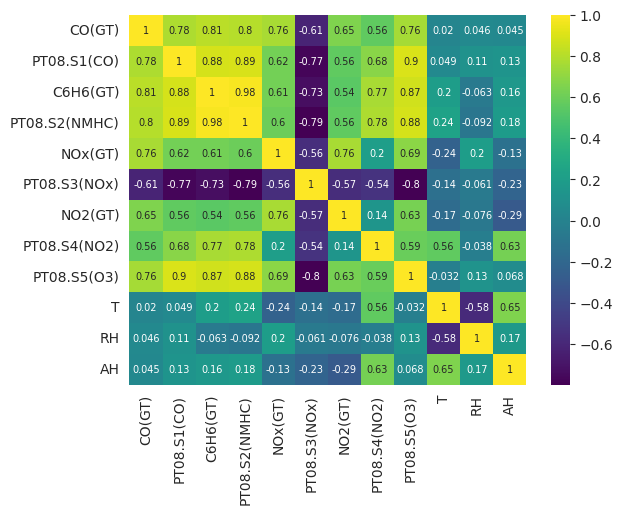

In [14]:
from caits.eda.correlation import corr, get_high_corr_features, keep_high_corr_features
import seaborn as sns

METHOD = "pearson"
THRESHOLD = 0.8

correlations = corr(train.X.values, method=METHOD)

sns.heatmap(
    correlations,
    cmap="viridis",
    xticklabels=train.X.keys()["axis_1"],
    yticklabels=train.X.keys()["axis_1"],
    annot=True,
    annot_kws={"size": 7},
)
plt.show()

In [15]:
highly_correlated_feats = get_high_corr_features(
    train.X.values,
    method=METHOD,
    threshold=THRESHOLD
)

print(highly_correlated_feats)

[0, 1, 2, 3, 8]


In [16]:
from sklearn.preprocessing import StandardScaler

corr_train = DatasetArray(train.X.iloc[:, highly_correlated_feats])
corr_test = DatasetArray(test.X.iloc[:, highly_correlated_feats])

scaler = SklearnWrapper(StandardScaler)

train_scaled = scaler.fit_transform(corr_train)
test_scaled = scaler.transform(corr_test)


In [17]:
X_train = train_scaled.X.iloc[:, :-1].values
y_train = train_scaled.X.iloc[:, [-1]].values
X_test = test_scaled.X.iloc[:, :-1].values
y_test = test_scaled.X.iloc[:, [-1]].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7485, 4)
(7485, 1)
(1872, 4)
(1872, 1)


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

y_mean = scaler.fitted_transformer_.mean_[-1]
y_std = scaler.fitted_transformer_.scale_[-1]

y_test_inv_scaled = y_test * y_std + y_mean
predictions_inv_scaled = predictions * y_std + y_mean

print("RMSE: ", root_mean_squared_error(y_test_inv_scaled, predictions_inv_scaled))
print("R2:", r2_score(y_test_inv_scaled, predictions_inv_scaled))


RMSE:  158.32173319832438
R2: 0.8287996948996954


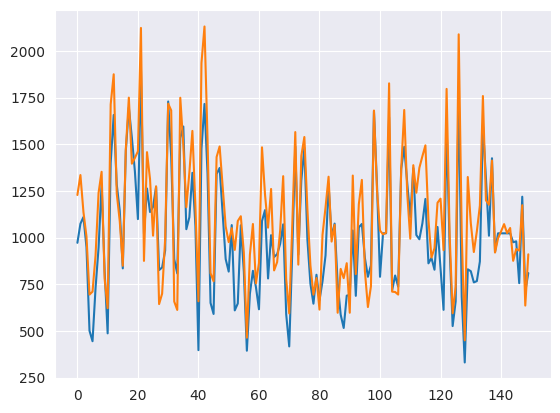

In [20]:
plt.plot(y_test_inv_scaled[:150])
plt.plot(predictions_inv_scaled[:150])
plt.show()

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adamax", metrics=["mse", "mae"])

history = model.fit(X_train, y_train[:, 0], epochs=100, batch_size=32, validation_split=0.2, verbose=1)


2025-11-14 15:30:17.945575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 15:30:17.977044: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-14 15:30:17.977075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-14 15:30:17.977100: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-14 15:30:17.983193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 15:30:17.983795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/100


2025-11-14 15:30:19.152338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-14 15:30:19.152600: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-14 15:30:19.153077: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

188/188 [==============================] - 1s 1ms/step - loss: 0.6717 - mse: 0.6717 - mae: 0.6349 - val_loss: 0.4497 - val_mse: 0.4497 - val_mae: 0.5117
Epoch 2/100
188/188 [==============================] - 0s 856us/step - loss: 0.3993 - mse: 0.3993 - mae: 0.4905 - val_loss: 0.3210 - val_mse: 0.3210 - val_mae: 0.4349
Epoch 3/100
188/188 [==============================] - 0s 856us/step - loss: 0.3003 - mse: 0.3003 - mae: 0.4285 - val_loss: 0.2513 - val_mse: 0.2513 - val_mae: 0.3880
Epoch 4/100
188/188 [==============================] - 0s 835us/step - loss: 0.2385 - mse: 0.2385 - mae: 0.3839 - val_loss: 0.2062 - val_mse: 0.2062 - val_mae: 0.3554
Epoch 5/100
188/188 [==============================] - 0s 891us/step - loss: 0.1990 - mse: 0.1990 - mae: 0.3517 - val_loss: 0.1802 - val_mse: 0.1802 - val_mae: 0.3338
Epoch 6/100
188/188 [==============================] - 0s 819us/step - loss: 0.1776 - mse: 0.1776 - mae: 0.3327 - val_loss: 0.1669 - val_mse: 0.1669 - val_mae: 0.3214
Epoch 7/100


In [22]:
predictions = model.predict(X_test)

y_mean = scaler.fitted_transformer_.mean_[-1]
y_std = scaler.fitted_transformer_.scale_[-1]

y_test_inv_scaled = y_test * y_std + y_mean
predictions_inv_scaled = predictions * y_std + y_mean

print("RMSE: ", root_mean_squared_error(y_test_inv_scaled, predictions_inv_scaled))
print("R2:", r2_score(y_test_inv_scaled, predictions_inv_scaled))

59/59 [==============================] - 0s 452us/step
RMSE:  155.67407304648324
R2: 0.8344778800551318


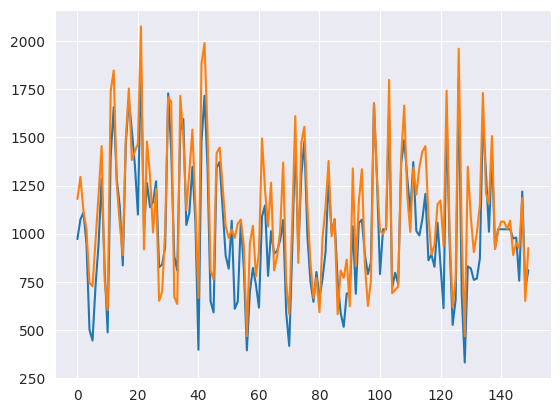

In [23]:
plt.plot(y_test_inv_scaled[:150])
plt.plot(predictions_inv_scaled[:150])
plt.show()


# ARIMA

In [29]:
X = preprocessed_data.X.iloc[:, highly_correlated_feats[:-1]].values
y = preprocessed_data.X.iloc[:, highly_correlated_feats[-1]].values

n, m = preprocessed_data.X.shape
idx = pd.date_range("2023-01-01 00:00:00", periods=n, freq="h")
y = pd.Series(y, index=idx, name=preprocessed_data.X.keys()["axis_1"][highly_correlated_feats[-1]])

In [30]:
X

array([[   2.6, 1360. ,   11.9, 1046. ],
       [   2. , 1292. ,    9.4,  955. ],
       [   2.2, 1402. ,    9. ,  939. ],
       ...,
       [   2.4, 1142. ,   12.4, 1063. ],
       [   2.1, 1003. ,    9.5,  961. ],
       [   2.2, 1071. ,   11.9, 1047. ]])

In [31]:
y

2023-01-01 00:00:00    1268.0
2023-01-01 01:00:00     972.0
2023-01-01 02:00:00    1074.0
2023-01-01 03:00:00    1203.0
2023-01-01 04:00:00    1110.0
                        ...  
2024-01-25 16:00:00    1729.0
2024-01-25 17:00:00    1269.0
2024-01-25 18:00:00    1092.0
2024-01-25 19:00:00     770.0
2024-01-25 20:00:00     816.0
Freq: h, Name: PT08.S5(O3), Length: 9357, dtype: float64

In [32]:
columns = [preprocessed_data.X.keys()["axis_1"][i] for i in highly_correlated_feats[:-1]]

exog = pd.DataFrame(X, columns=columns, index=idx)
print(exog)

                     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)
2023-01-01 00:00:00     2.6       1360.0      11.9         1046.0
2023-01-01 01:00:00     2.0       1292.0       9.4          955.0
2023-01-01 02:00:00     2.2       1402.0       9.0          939.0
2023-01-01 03:00:00     2.2       1376.0       9.2          948.0
2023-01-01 04:00:00     1.6       1272.0       6.5          836.0
...                     ...          ...       ...            ...
2024-01-25 16:00:00     3.1       1314.0      13.5         1101.0
2024-01-25 17:00:00     2.4       1163.0      11.4         1027.0
2024-01-25 18:00:00     2.4       1142.0      12.4         1063.0
2024-01-25 19:00:00     2.1       1003.0       9.5          961.0
2024-01-25 20:00:00     2.2       1071.0      11.9         1047.0

[9357 rows x 4 columns]


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import pmdarima as pm

CUT = int(0.8 * n)
y_tr, y_te = y.iloc[:CUT], y.iloc[CUT:]
exog_tr, exog_te = exog.iloc[:CUT], exog.iloc[CUT:]

order = (1,1,1)
seasonal_order = (1, 0, 1, 24)


auto = pm.auto_arima(
    y_tr,
    exogenous=exog_tr,
    seasonal=True,
    m=24,
    start_p=0,
    start_q=0,
    max_p=3,
    max_q=3,
    max_d=2,
    start_P=0,
    start_Q=0,
    max_P=2,
    max_Q=2,
    max_D=1,
    information_criterion="aic",
    trace=False,
    error_action="ignore"
)
order = auto.order
seasonal_order = auto.seasonal_order


print("Using order: ", order, "seasonal order: ", seasonal_order)

model = SARIMAX(
    y_tr,
    exog=exog_tr,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
)
res = model.fit(disp=True)

pred = res.get_forecast(steps=len(y_te), exog=exog_te)
y_pred = pd.Series(pred.predicted_mean, index=y_te.index)

# Evaluate
mae = mean_absolute_error(y_te, y_pred)
rmse = math.sqrt(mean_squared_error(y_te, y_pred))
r2 = r2_score(y_te, y_pred)
print(f"Test: MAE={mae:.3f}  RMSE={rmse:.3f}  R2={r2:.3f}")


/home/AIoT03/.conda/envs/crossai-ts/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/AIoT03/.conda/envs/crossai-ts/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/AIoT03/.conda/envs/crossai-ts/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/AIoT03/.conda/envs/crossai-ts/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/AIoT03/.conda/envs/crossai-ts/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force

Using order:  (3, 1, 0) seasonal order:  (2, 0, 0, 24)
Test: MAE=253.151  RMSE=306.849  R2=0.508


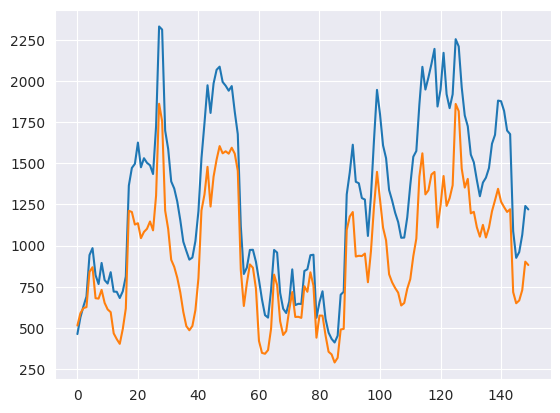

In [37]:
plt.plot(y_te[:150].values)
plt.plot(y_pred[:150].values)
plt.show()